# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

Kais SELLAMI, Cédric MARTIN (B2)

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [167]:
import csv
import numpy as np
from utils import load_from_csv
from sklearn import tree

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

#Configurations that likely provide diffferent topologies:
     # splitter        max depth          min sample leaf
     # best              None                 1
     # best              None                10
     # best              None                50
     # best               5                  1
     # best               5                  10
     # best               5                  50

config = [['best', None, 1], ['best', None, 10], ['best', None, 50], ['best', 5, 1], ['best', 5, 10], ['best', 5, 50]]

Q2: Train a decision tree for each of the previous configurations on the full dataset

In [168]:
decision_trees = []
decision_trees_config = []
for configuration in config:
    clf = tree.DecisionTreeClassifier(splitter = configuration[0], max_depth = configuration[1], min_samples_leaf = configuration[2])
    decision_trees_config.append(clf)
    decision_trees.append(clf.fit(train_examples, train_labels))

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [169]:
# we will display the accuracy on the 5-cross validation on the different decision trees :
from sklearn.model_selection import KFold
import pandas as pd

kf = KFold(n_splits=5)
results = []
i = 1

for x_train_index, x_test_index in kf.split(train_examples):
    x_train, x_test = train_examples[x_train_index], train_examples[x_test_index]
    y_train, y_test = train_labels[x_train_index], train_labels[x_test_index]
    result = []
    result.append(i)
    for configuration in [decision_trees_config[0], decision_trees_config[2]]:
        clf = configuration.fit(x_train, y_train)
        result.append(clf.score(x_train, y_train))
        result.append(clf.score(x_test, y_test))
        
    results.append(result)
    
    i+=1
results_df = pd.DataFrame(results, columns=["k index", "Train config 1", "Test config 1", "Train config 3", "Test config 3"])
print("config 1 = best splitter, No max depth defined, 1 as min sample leaf \n")
print("config 2 = best splitter, max depth defined = 5, min sample leaf = 500\n \n")
print(results_df)

config 1 = best splitter, No max depth defined, 1 as min sample leaf 

config 2 = best splitter, max depth defined = 5, min sample leaf = 500
 

   k index  Train config 1  Test config 1  Train config 3  Test config 3
0        1        0.697250       0.648341        0.680654       0.665403
1        2        0.694642       0.661611        0.678521       0.655924
2        3        0.698198       0.643602        0.682314       0.665403
3        4        0.696137       0.652751        0.679071       0.675522
4        5        0.698744       0.628083        0.680967       0.666034


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

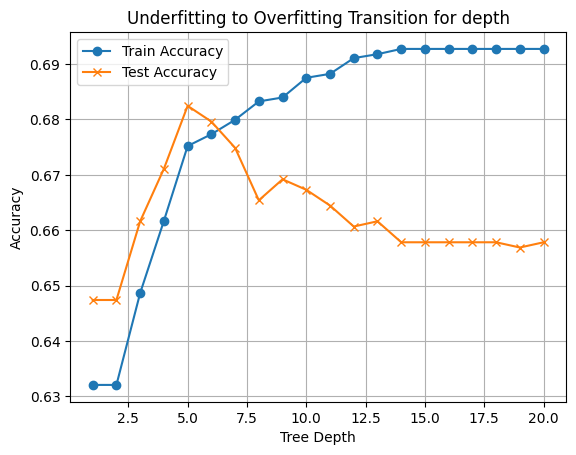

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)

train_best_scores = []
test_best_scores = []
train_random_scores = []
test_random_scores = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    train_best_scores.append(clf.score(x_train, y_train))
    test_best_scores.append(clf.score(x_test, y_test))
    

# Plotting
plt.plot(depths, train_best_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_best_scores, label='Test Accuracy', marker='x')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Underfitting to Overfitting Transition for depth")
plt.legend()
plt.grid(True)
plt.show()


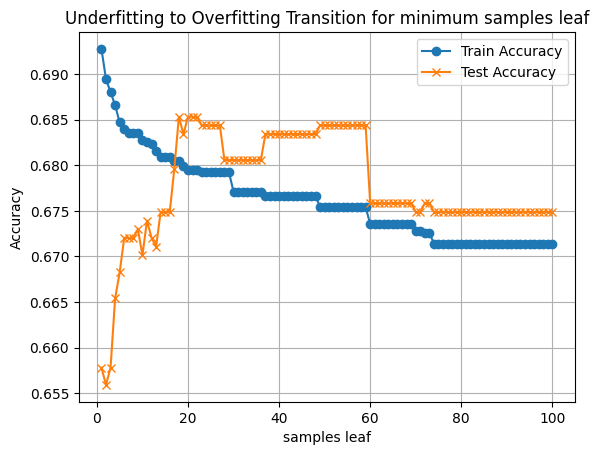

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = load_wine()
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)

train_best_scores = []
test_best_scores = []
samples_leaf = range(1, 101)

for leaf in samples_leaf:
    clf = DecisionTreeClassifier(min_samples_leaf=leaf)
    clf.fit(x_train, y_train)
    train_best_scores.append(clf.score(x_train, y_train))
    test_best_scores.append(clf.score(x_test, y_test))
    
plt.plot(samples_leaf, train_best_scores, label='Train Accuracy', marker='o')
plt.plot(samples_leaf, test_best_scores, label='Test Accuracy', marker='x')
plt.xlabel("samples leaf")
plt.ylabel("Accuracy")
plt.title("Underfitting to Overfitting Transition for minimum samples leaf")
plt.legend()
plt.grid(True)
plt.show()


### splitter
Through the tests ran during the lab, the ***splitter strategy*** (best or random) does almost ***not affect*** our accuracy.
### maximum depth
We notice in the previous graphs that the best configurations in term of maximum tree depth is 5. We can note that for a depth in the range of **[4 - 7]** the accuracy is acceptable **(>67%)**
### minimum samples leaf
We note that the best accuracy on the test samples is located between **15 and 20**.
Actually for a minimum accuracy of 68%, a minimum samples leaf value should be in the range [ 18 - 60 ] with a best accuracy at 20.
### best configuration
Now, in order to select the best configuration in term of depth and minimum samples leaf, we are going to test the two configurations. The results will be exposed below.

In [172]:
depths = range(4, 8)
min_leaf = range(18, 60)
results = []
for d in depths:
    result = []
    for leaf in min_leaf:
        x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)
        clf = DecisionTreeClassifier(splitter = 'best', max_depth = d ,min_samples_leaf=leaf)
        clf.fit(x_train, y_train)
        result.append(clf.score(x_train, y_train))
    results.append(result)

test_df = pd.DataFrame(results, index=[f"depth={d}" for d in depths], columns=min_leaf)
print(test_df)

               18        19        20        21        22        23        24  \
depth=4  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451   
depth=5  0.673542  0.673542  0.673542  0.673542  0.673542  0.673542  0.673542   
depth=6  0.674727  0.674727  0.674253  0.674253  0.674253  0.674016  0.674016   
depth=7  0.676624  0.676624  0.676150  0.676150  0.676150  0.675913  0.675913   

               25        26        27  ...        50        51        52  \
depth=4  0.661451  0.661451  0.661451  ...  0.661451  0.661451  0.661451   
depth=5  0.673542  0.673542  0.673542  ...  0.673542  0.673542  0.673542   
depth=6  0.674016  0.674016  0.674016  ...  0.673542  0.673542  0.673542   
depth=7  0.675913  0.675913  0.675913  ...  0.673779  0.673779  0.673779   

               53        54        55        56        57        58        59  
depth=4  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451  
depth=5  0.673542  0.673542  0.673542  0.673542  0.67

In [173]:
argm = np.argmax(results)
i = argm//(60-18)
j = argm%(60-18)

print("maximum accuracy = ",results[i][j])
print("best configuration : depth = ", 4+i, " and minimum samples leaf = ", 18+j)

maximum accuracy =  0.676623992413466
best configuration : depth =  7  and minimum samples leaf =  18


In [174]:
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(splitter = 'best', max_depth = 7,min_samples_leaf=18) 
clf.fit(x_train, y_train)
print("train accurancy = ",clf.score(x_train, y_train)) 

train accurancy =  0.676623992413466


Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

As from the results of the tests above, we constructed our model based on splitter=best, max depth = 7 and minimum leaf samples = 18.
We stored this configuration in the clf variable. For now let's build the confusion matrix:

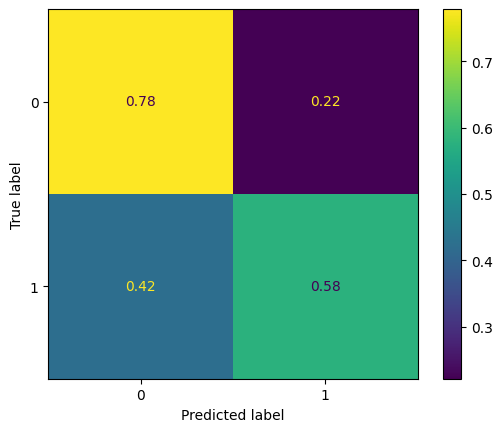

In [176]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, normalize = 'true')

Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [177]:
# in order to evaluate the fairness we will proceed to do the tests on different group of samples
    # first we will only keep lines respresenting african-americans
    # we will redo the the confusion matrix
    
    # same for the caucasians
    #and we will compare the fairness of this model compared to race
print(features[0], features[1])
african_american_examples = []
caucasian_examples = []

african_american_labels = []
caucasian_labels = []

for i in range(len(train_examples)) : 
    if(train_examples[i][0]==1):
        african_american_examples.append(train_examples[i])
        african_american_labels.append(train_labels[i])
    if(train_examples[i][1]==1):
        caucasian_examples.append(train_examples[i])
        caucasian_labels.append(train_labels[i])
african_american_examples = np.array(african_american_examples)
caucasian_examples = np.array(caucasian_examples)

print("total : ",len(train_examples) , "= african_american: ",len(african_american_examples) , " + caucasian: ",len(caucasian_examples))


race_African-American race_Caucasian
total :  5273 = african_american:  3173  + caucasian:  2100


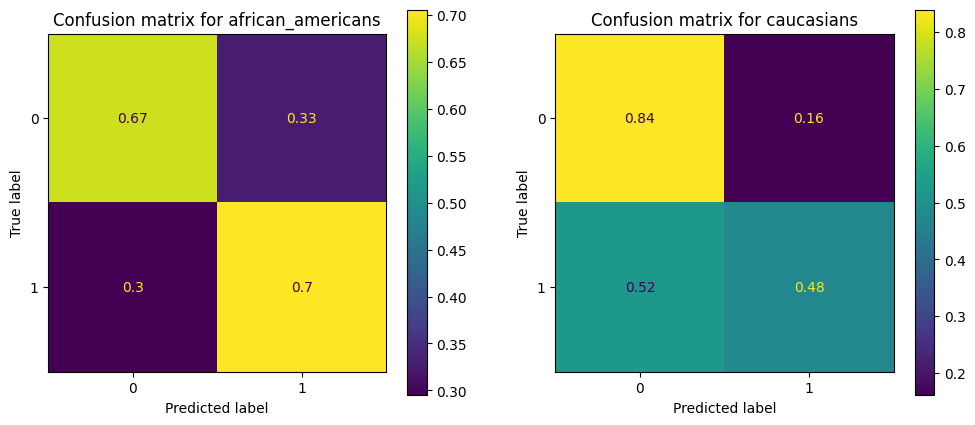

In [178]:
#we keep 40% of the data that we pick randomly to do the tests ( it is to note that : this data may contain some of the data we used to train the model)
_, x_test_african_american, _, y_test_african_american = train_test_split(african_american_examples, african_american_labels, test_size=0.4, random_state=1)
_, x_test_caucasian, _, y_test_caucasian = train_test_split(caucasian_examples, caucasian_labels, test_size=0.4, random_state=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(clf, x_test_african_american, y_test_african_american, normalize = 'true', ax=axes[0])
axes[0].set_title("Confusion matrix for african_americans")

ConfusionMatrixDisplay.from_estimator(clf, x_test_caucasian, y_test_caucasian, normalize = 'true', ax=axes[1])
axes[1].set_title("Confusion matrix for caucasians")
plt.show()

As shown in the figures above, ***the false positive rate*** is nearly **twice as high for African-Americans compared to Caucasians**. This indicates a significant **bias**, as the model is more likely to wrongly predict that an African-American individual will reoffend. Such a disparity raises serious concerns about the fairness and equity of the model. It suggests that the model may be **reflecting or amplifying existing societal biases**, typically ***racism***.

In [146]:
# we are going to do the same tests for males and females
print(features[2], features[3])
females_examples = []
males_examples = []

females_labels = []
males_labels = []

for i in range(len(train_examples)) : 
    if(train_examples[i][2]==1):
        females_examples.append(train_examples[i])
        females_labels.append(train_labels[i])
    if(train_examples[i][3]==1):
        males_examples.append(train_examples[i])
        males_labels.append(train_labels[i])
females_examples = np.array(females_examples)
males_examples = np.array(males_examples)

print("total : ",len(train_examples) , "= females: ",len(females_examples) , " + males: ",len(males_examples))


gender_Female gender_Male
total :  5273 = females:  1029  + males:  4244


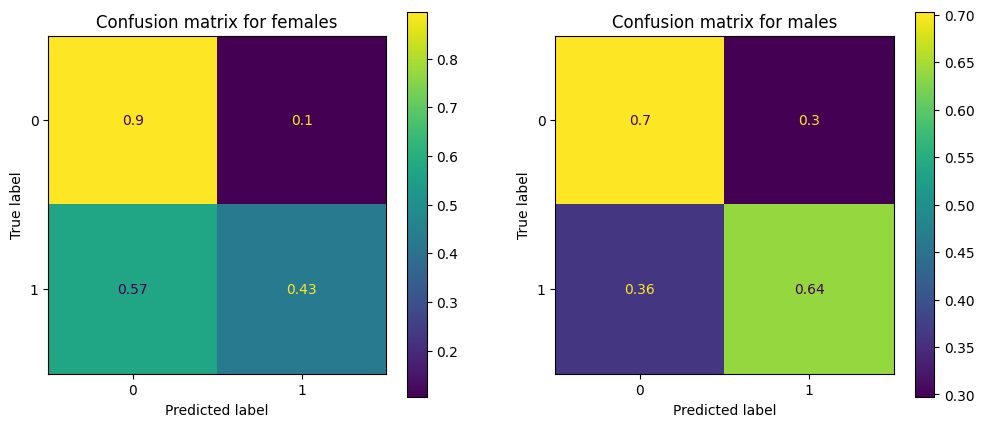

In [154]:
_, x_test_females, _, y_test_females = train_test_split(females_examples, females_labels, test_size=0.4, random_state=1)
_, x_test_males, _, y_test_males = train_test_split(males_examples, males_labels, test_size=0.4, random_state=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(clf, x_test_females, y_test_females, normalize = 'true', ax=axes[0])
axes[0].set_title("Confusion matrix for females")

ConfusionMatrixDisplay.from_estimator(clf, x_test_males, y_test_males, normalize = 'true', ax=axes[1])
axes[1].set_title("Confusion matrix for males")
plt.show()

The false positive rate is ***three times higher for male individuals***. When comparing the false negative rate, we can easily see that the model is much more inclined to predict that men are likely to be re-incarcerated. This indicates a clear **gender bias** in the model's predictions.
    As for now we can confirm that our model is biased based on **race and gender**. We can ran small tests in order to compare the false negative rate for every (race, gender) couple in order to see the effect of this bias.

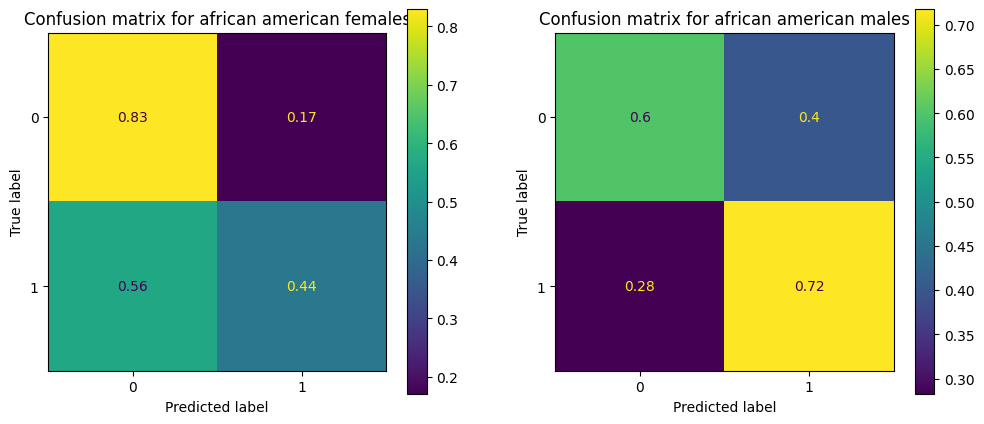

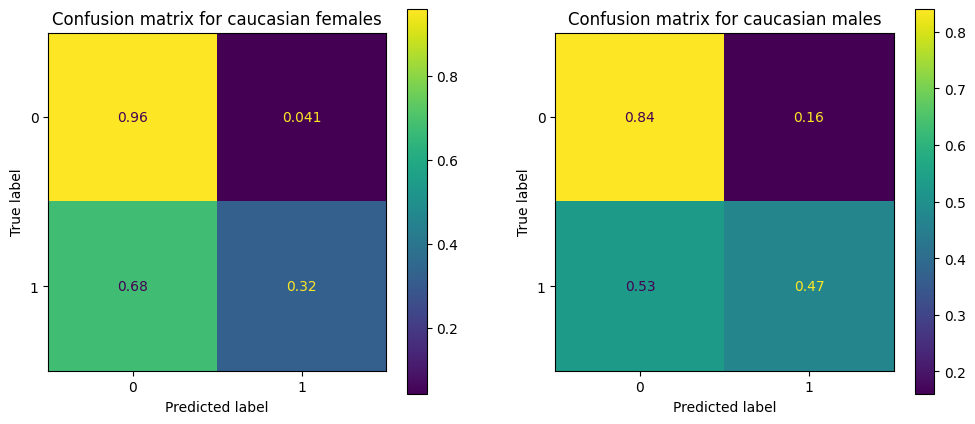

In [165]:
females_african_american_examples = []
males_african_american_examples = []
females_caucasian_examples = []
males_caucasian_examples = []

females_african_american_labels = []
males_african_american_labels = []
females_caucasian_labels = []
males_caucasian_labels = []


for i in range(len(train_examples)) : 
    if(train_examples[i][0]==1 and train_examples[i][2]==1):
        females_african_american_examples.append(train_examples[i])
        females_african_american_labels.append(train_labels[i])
    if(train_examples[i][0]==1 and train_examples[i][3]==1):
        males_african_american_examples.append(train_examples[i])
        males_african_american_labels.append(train_labels[i])
    if(train_examples[i][1]==1 and train_examples[i][2]==1):
        females_caucasian_examples.append(train_examples[i])
        females_caucasian_labels.append(train_labels[i])
    if(train_examples[i][1]==1 and train_examples[i][3]==1):
        males_caucasian_examples.append(train_examples[i])
        males_caucasian_labels.append(train_labels[i])
females_african_american_examples = np.array(females_african_american_examples)
males_african_american_examples = np.array(males_african_american_examples)
females_caucasian_examples = np.array(females_caucasian_examples)
males_caucasian_examples = np.array(males_caucasian_examples)

_, x_test_females_african_american, _, y_test_females_african_american = train_test_split(females_african_american_examples, females_african_american_labels, test_size=0.4, random_state=1)
_, x_test_males_african_american, _, y_test_males_african_american = train_test_split(males_african_american_examples, males_african_american_labels, test_size=0.4, random_state=1)
_, x_test_females_caucasian, _, y_test_females_caucasian = train_test_split(females_caucasian_examples, females_caucasian_labels, test_size=0.4, random_state=1)
_, x_test_males_caucasian, _, y_test_males_caucasian = train_test_split(males_caucasian_examples, males_caucasian_labels, test_size=0.4, random_state=1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(clf, x_test_females_african_american, y_test_females_african_american, normalize = 'true', ax=axes[0])
axes[0].set_title("Confusion matrix for african american females")

ConfusionMatrixDisplay.from_estimator(clf, x_test_males_african_american, y_test_males_african_american, normalize = 'true', ax=axes[1])
axes[1].set_title("Confusion matrix for african american males")
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(clf, x_test_females_caucasian, y_test_females_caucasian, normalize = 'true', ax=axes2[0])
axes2[0].set_title("Confusion matrix for caucasian females")

ConfusionMatrixDisplay.from_estimator(clf, x_test_males_caucasian, y_test_males_caucasian, normalize = 'true', ax=axes2[1])
axes2[1].set_title("Confusion matrix for caucasian males")
plt.show()

In our models, as shown in the figures above, **African American males** are falsely predicted as positive at a rate nearly **ten times higher** than **Caucasian females**.

This clearly demonstrates that the model is **not fair** => it exhibits **bias based on both race and gender**, disproportionately disadvantaging **Black American men**.
